In [1]:
# {"question": "where will the next summer and winter olympics be held", "id": 2098168902147822379, "edited_question": "where will the next summer and winter olympics be held as of 2021", "date": "2021", "date_type": "sampled_year", "answer": ["Japan and China"], "any_answer": ["Brazil and S. Korea", "Japan and China"], "cosine_distance": 0.85309898853302}
# {"question": "where will the next summer and winter olympics be held", "id": 2098168902147822379, "edited_question": "where will the next summer and winter olympics be held as of 2018", "date": "2018", "date_type": "sampled_year", "answer": ["Brazil and S. Korea"], "any_answer": ["Brazil and S. Korea", "Japan and China"], "cosine_distance": 0.8699365258216858}
# {"question": "where will the next summer and winter olympics be held", "id": 2098168902147822379, "edited_question": "where will the next summer and winter olympics be held as of 2017", "date": "2017", "date_type": "sampled_year", "answer": ["Brazil and S. Korea"], "any_answer": ["Brazil and S. Korea", "Japan and China"], "cosine_distance": 0.8682183027267456}
# {"question": "where will the next summer and winter olympics be held", "id": 2098168902147822379, "edited_question": "where will the next summer and winter olympics be held as of 2020", "date": "2020", "date_type": "start", "answer": ["Japan and China"], "any_answer": ["Brazil and S. Korea", "Japan and China"], "cosine_distance": 0.8473514318466187}
# {"question": "where will the next summer and winter olympics be held", "id": 2098168902147822379, "edited_question": "where will the next summer and winter olympics be held as of 2016", "date": "2016", "date_type": "start", "answer": ["Brazil and S. Korea"], "any_answer": ["Brazil and S. Korea", "Japan and China"], "cosine_distance": 0.8734415769577026}


# {"edited_question": "where will the next summer and winter olympics be held as of 2021", "date": "2021", "answer": ["Japan and China"], "any_answer": ["Brazil and S. Korea", "Japan and China"]}
# {"edited_question": "where will the next summer and winter olympics be held as of 2018", "date": "2018", "answer": ["Brazil and S. Korea"], "any_answer": ["Brazil and S. Korea", "Japan and China"]}
# {"edited_question": "where will the next summer and winter olympics be held as of 2017", "date": "2017", "answer": ["Brazil and S. Korea"], "any_answer": ["Brazil and S. Korea", "Japan and China"]}
# {"edited_question": "where will the next summer and winter olympics be held as of 2020", "date": "2020", ""answer": ["Japan and China"], "any_answer": ["Brazil and S. Korea", "Japan and China"]}
# {"edited_question": "where will the next summer and winter olympics be held as of 2016", "date": "2016", ""answer": ["Brazil and S. Korea"], "any_answer": ["Brazil and S. Korea", "Japan and China"]}


# Read the data from the file
import json
def read_jsonl(path: str) -> list[dict]:
    with open(path, 'r') as f:
        data = [json.loads(line) for line in f if line.strip() != '']
    return data


In [2]:
path = "/home/work/khyunjin1993/dev/myrepo/temporal_alignment_rag/dataset/SituatedQA/data/qa_data/temp.train.2018.jsonl"
data = read_jsonl(path)
data[0]

{'question': 'when was the last time the united states hosted the olympics',
 'id': 1585316578999504970,
 'edited_question': 'when was the last time the united states hosted the olympics as of 1986',
 'date': '1986',
 'date_type': 'sampled_year',
 'answer': ['1984'],
 'any_answer': ['1984', '1980'],
 'cosine_distance': 0.7471016049385071}

In [3]:
'''
{'when was the last time the united states hosted the olympics': 
  [{'date': '1986', 'cosine_distance': 0.7471016049385071},
  {'date': '1990', 'cosine_distance': 0.7703179717063904},
  {'date': '1981', 'cosine_distance': 0.7339534163475037},
  {'date': '1982', 'cosine_distance': 0.7546384930610657},
  {'date': '1984', 'cosine_distance': 0.7469860315322876},
  {'date': '1980', 'cosine_distance': 0.7727522850036621}]}
'''

data_dict = {}
for d in data:
    if d['question'] not in data_dict:
        data_dict[d['question']] = []
    data_dict[d['question']].append({'date': d['date'], 'cosine_distance': d['cosine_distance']})

In [4]:
# remove the questions that does not contain date "2018" or "2021"
# data_dict = {k: v for k, v in data_dict.items() if any(d['date'] in ['2018', '2021'] for d in v)}

data_dict = {k: v for k, v in data_dict.items() if any(d['date'] in ['2018'] for d in v)}


# remove the questions that does not contain date "2018" and "2021"
# data_dict = {k: v for k, v in data_dict.items() if all(d['date'] in ['2018', '2021'] for d in v)}

# remove the questions that has less than 3 dates
data_dict = {k: v for k, v in data_dict.items() if len(v) > 3}

In [5]:
data_dict.__len__()

218

In [6]:
for k, v in data_dict.items():
    print(k)
    print(v)
    break

when’s the last time the houston astros won the world series
[{'date': '2018', 'cosine_distance': 0.7569650411605835}, {'date': '2019', 'cosine_distance': 0.7299472093582153}, {'date': '1989', 'cosine_distance': 0.738701581954956}, {'date': '2000', 'cosine_distance': 0.7275009155273438}, {'date': '2017', 'cosine_distance': 0.7267023324966431}, {'date': '1962', 'cosine_distance': 0.7552767992019653}]


In [7]:
# sample 10 questions that cosine distance is highest for the date "2018"
sampled_data_dict = {}
for k, v in data_dict.items():
    max_flag = 0
    dates = [d['date'] for d in v]
    cos_dist = [d['cosine_distance'] for d in v]
    
    # find maximum cosine distance
    max_cos_dist = max(cos_dist)
    for d in v:
        if d['cosine_distance'] == max_cos_dist and d['date'] == '2018':
            max_flag = 1
            break
    
    if max_flag == 1:
        sampled_data_dict[k] = v
    

sampled_data_dict

{'when’s the last time the houston astros won the world series': [{'date': '2018',
   'cosine_distance': 0.7569650411605835},
  {'date': '2019', 'cosine_distance': 0.7299472093582153},
  {'date': '1989', 'cosine_distance': 0.738701581954956},
  {'date': '2000', 'cosine_distance': 0.7275009155273438},
  {'date': '2017', 'cosine_distance': 0.7267023324966431},
  {'date': '1962', 'cosine_distance': 0.7552767992019653}],
 'who won the state of virginia in the last presidential election': [{'date': '2021',
   'cosine_distance': 0.7596486210823059},
  {'date': '2019', 'cosine_distance': 0.7612237930297852},
  {'date': '2018', 'cosine_distance': 0.7687619924545288},
  {'date': '2020', 'cosine_distance': 0.7595597505569458},
  {'date': '2016', 'cosine_distance': 0.7509998083114624}],
 'who is the present president of international court of justice': [{'date': '2020',
   'cosine_distance': 0.6966105103492737},
  {'date': '2019', 'cosine_distance': 0.7011221051216125},
  {'date': '2021', 'cosine

In [8]:
# sort the dates by past to future
for k, v in sampled_data_dict.items():
    sampled_data_dict[k] = sorted(v, key=lambda x: x['date'])

sampled_data_dict

{'when’s the last time the houston astros won the world series': [{'date': '1962',
   'cosine_distance': 0.7552767992019653},
  {'date': '1989', 'cosine_distance': 0.738701581954956},
  {'date': '2000', 'cosine_distance': 0.7275009155273438},
  {'date': '2017', 'cosine_distance': 0.7267023324966431},
  {'date': '2018', 'cosine_distance': 0.7569650411605835},
  {'date': '2019', 'cosine_distance': 0.7299472093582153}],
 'who won the state of virginia in the last presidential election': [{'date': '2016',
   'cosine_distance': 0.7509998083114624},
  {'date': '2018', 'cosine_distance': 0.7687619924545288},
  {'date': '2019', 'cosine_distance': 0.7612237930297852},
  {'date': '2020', 'cosine_distance': 0.7595597505569458},
  {'date': '2021', 'cosine_distance': 0.7596486210823059}],
 'who is the present president of international court of justice': [{'date': '2018',
   'cosine_distance': 0.7148013114929199},
  {'date': '2019', 'cosine_distance': 0.7011221051216125},
  {'date': '2020', 'cosine

In [9]:
# sample 10 question in the sampled_data_dict
sampled_data_dict = dict(list(sampled_data_dict.items())[:10])

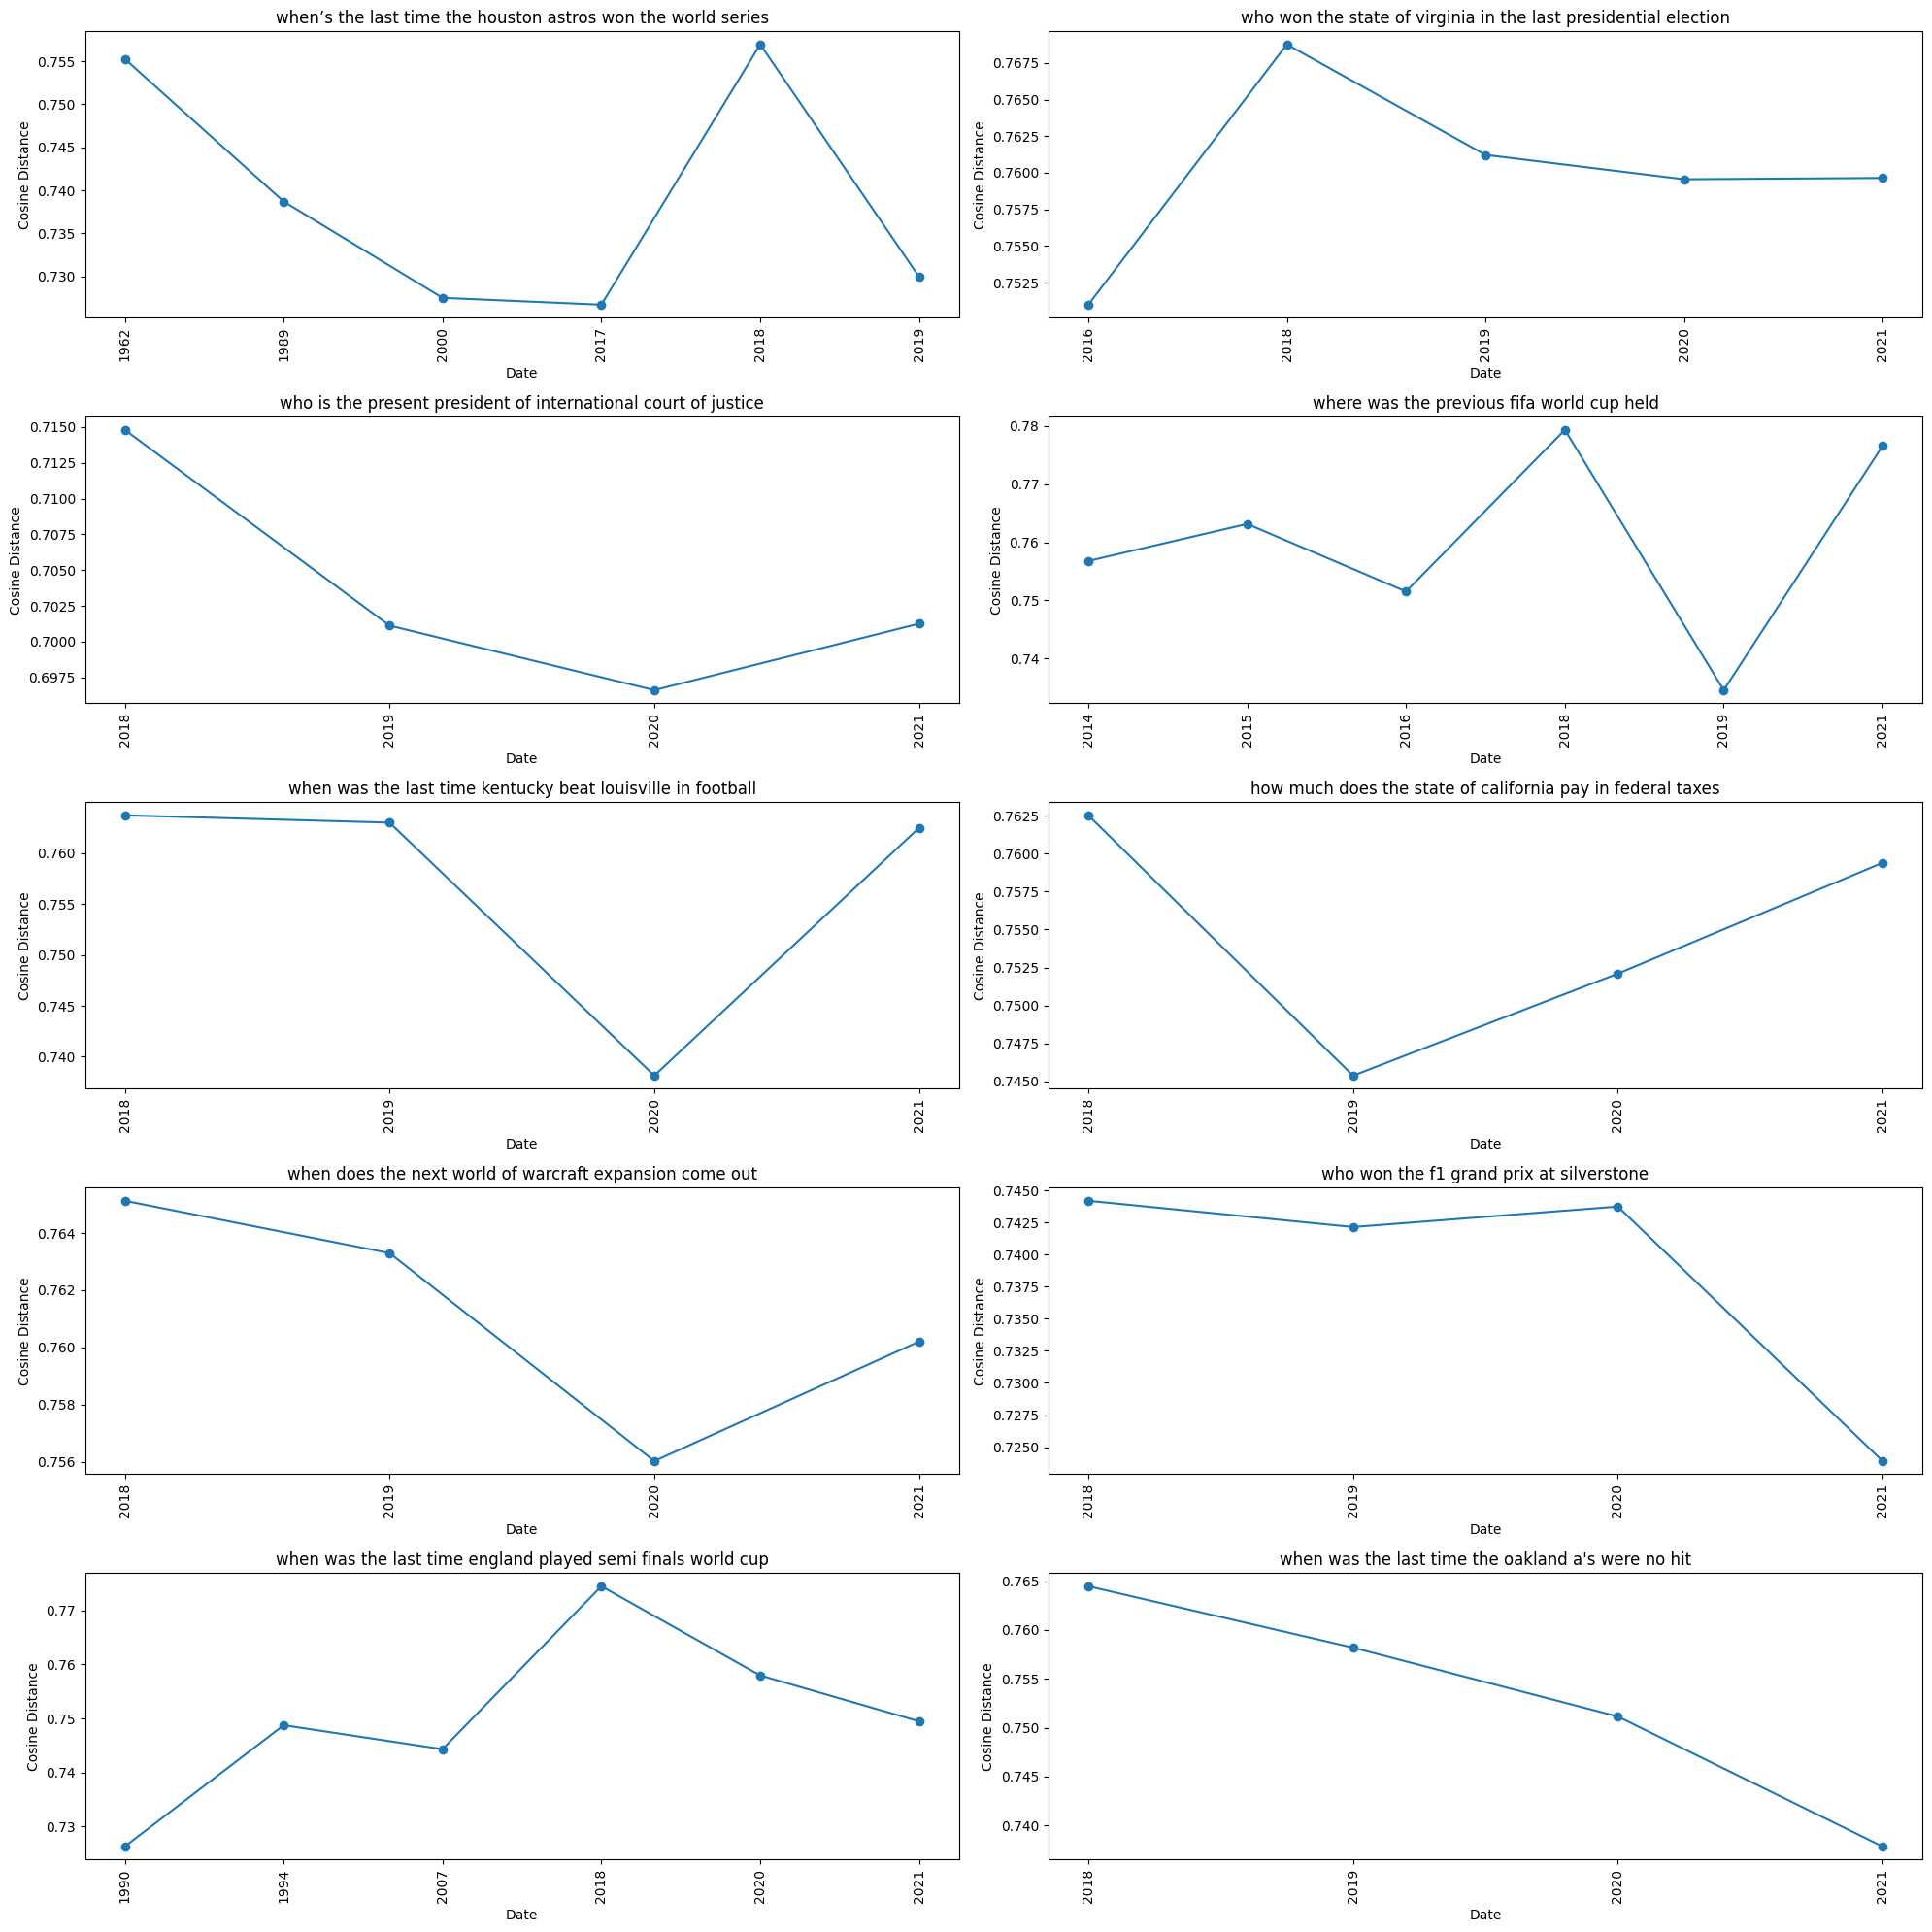

In [10]:
# line plot the cosine distance for each question and put it in the same plot
# X-axis: date, Y-axis: cosine_distance
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(5, 2, figsize=(20, 20))
for i, (question, dates) in enumerate(sampled_data_dict.items()):
    x = [d['date'] for d in dates]
    y = [d['cosine_distance'] for d in dates]
    ax[i//2, i%2].plot(x, y, marker='o')
    ax[i//2, i%2].set_title(question)
    ax[i//2, i%2].set_xlabel('Date')
    ax[i//2, i%2].set_ylabel('Cosine Distance')
    ax[i//2, i%2].set_xticks(np.arange(len(x)))
    ax[i//2, i%2].set_xticklabels(x, rotation=90)
plt.tight_layout()
plt.show()


['1962', '1989', '2000', '2017', '2018', '2019']
['2016', '2018', '2019', '2020', '2021']
['2018', '2019', '2020', '2021']
['2014', '2015', '2016', '2018', '2019', '2021']
['2018', '2019', '2020', '2021']
['2018', '2019', '2020', '2021']
['2018', '2019', '2020', '2021']
['2018', '2019', '2020', '2021']
['1990', '1994', '2007', '2018', '2020', '2021']
['2018', '2019', '2020', '2021']


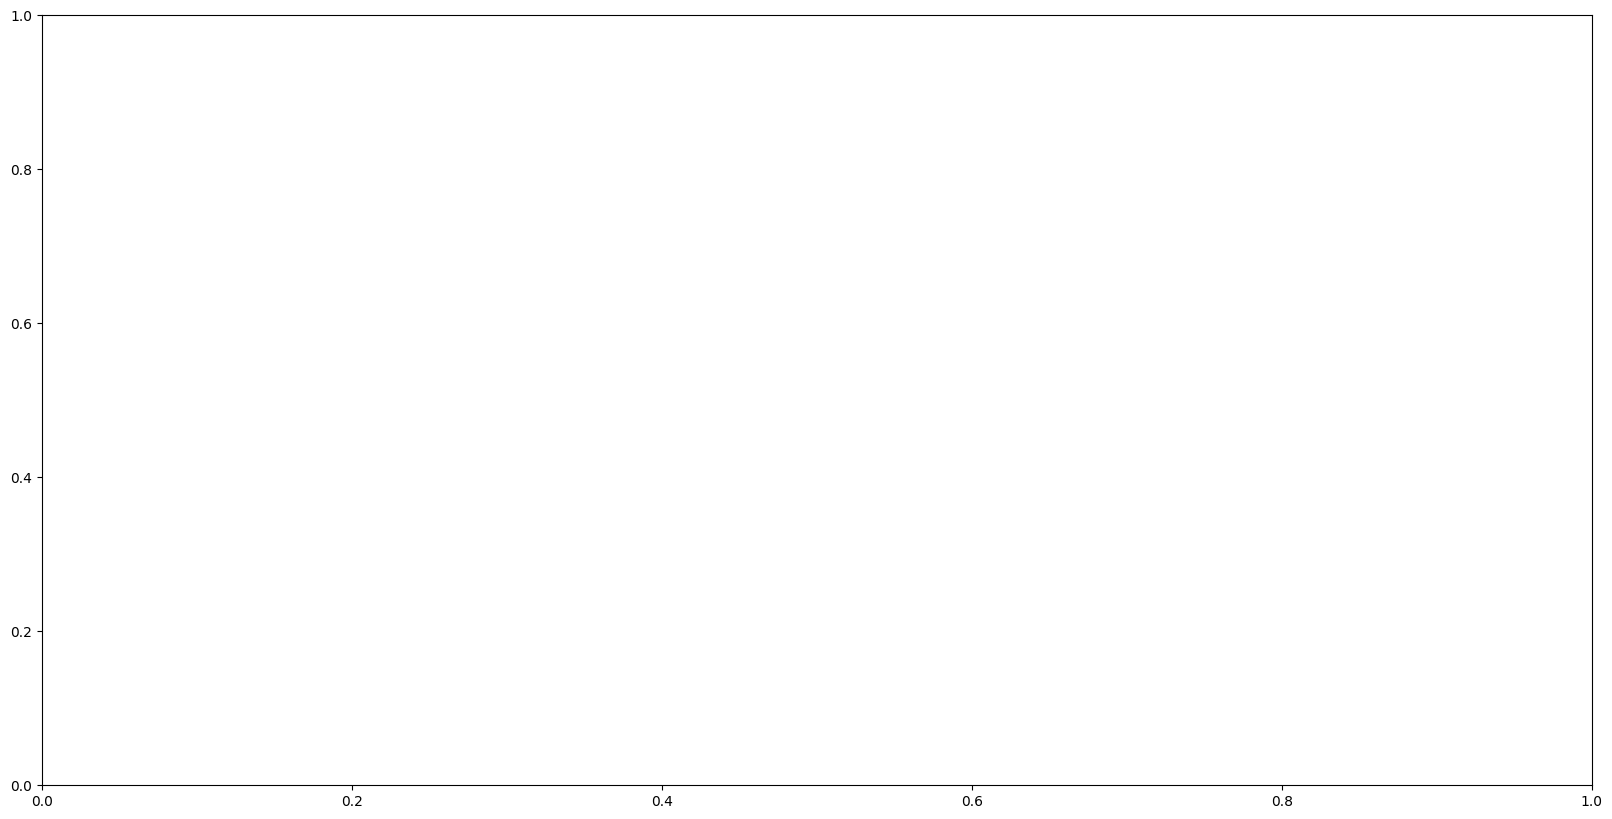

In [11]:
# plot the figure in the same plot
fig, ax = plt.subplots(figsize=(20, 10))
for i, (question, dates) in enumerate(sampled_data_dict.items()):
    x = [d['date'] for d in dates]
    y = [d['cosine_distance'] for d in dates]
    print(x)